# 통계적 관계 시각화하기

통계분석은 데이터셋의 변수(독립변수-종속변수)들이 서로 어떻게 연관이있는지 이해하는 과정이다. 어떻게 연관이 있는지는 다른 변수들에 달렸다.
시각화는 이 연관을 찾아내는 것의 가장 핵심적인 요소이며 데이터를 잘 시각화했을 때, 우리는 데이터의 트렌드와 패턴을 알아차릴 수 있다.

이 튜토리얼에서는 seaborn의 주요 3개함수에 대해서 다룰 7것이다. 하나는 'replot()이다. 이는 통계적 관계를 시각화하기 위한 figure-level function이며 이를 위해서 산점도 plots 혹은 라인 plots을 사용한다. replot()은 'FacetGrid'과 2개의 axes-level function인 scatterplot, lineplots을 결합해준다.

아래에서 알아보겠지만, 데이터가 복잡하더라도 이 두 함수를 이용해서 쉽게 표현할 수 있다. 이것을 이용하여 2차원의 그래프들을 표현할 수 있으며 이는 또한, 3개의 추가 변수를 맵핑하여 설명을 더할 수 있다.(hue, size, style)

import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

# 산점도를 이용하여 변수의 관계를 정의하기

산점도는 데이터 시각화의 mainstay이다. 산점도는 2개 변수의 연관도에 대한 분포를묘사해준다. 이러한 산점도의 표현덕분에 우리는 단순하게 눈으로 2개의 데이터가 연과이 있는 지 없는 지 추론해낼 수 있다.

seaborn에서 산점도를 그리는 방법은 아주 많은데 가장 기본적인 방법은 2개 변수를 숫자형변수로 상용하는 방법인데 이는 scatterplot() 함수를 이용하여 만들 수 있다.

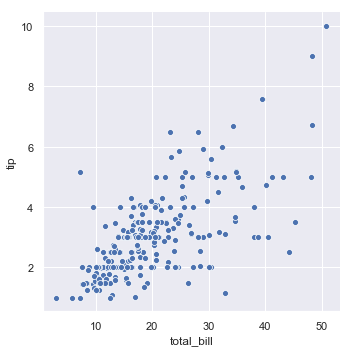

In [8]:
tips = sns.load_dataset('tips') # pandas dataframe 
sns.relplot(x='total_bill', y='tip', data=tips) # data = Dataframe / x, y는 dataframe의 column이 되겠다.

In [7]:
type(tips)

pandas.core.frame.DataFrame

In [ ]:
aaa

2차원안에서의 각 점들을 찍으면서 다른 차원(변수)도 또한 추가할 수 있다. 다른 차원의 변수들은 색깔로표현된다.(따라서 boolean 등으로 표현해야할 듯?) seaborn에서는 이러한 요소를 hue semantic이라고 부른다. 왜냐면 점의 색깔이 의미를 가지기 때문이다.

In [9]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


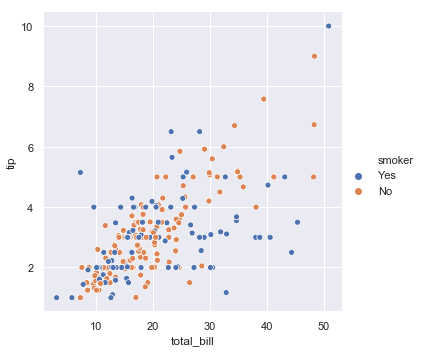

In [10]:
sns.relplot(x='total_bill', y='tip', hue='smoker', data=tips)

그 관계를 더욱 잘 표현해주기 위해서 smoker에 스타일을 넣을 수도 있다. 

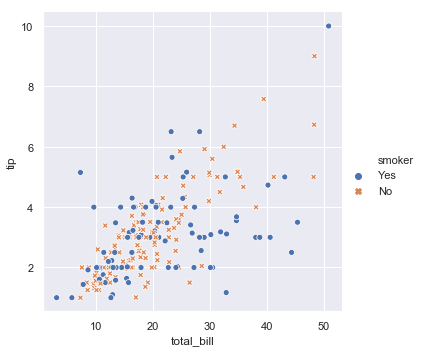

In [11]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker",data=tips)

hue, style property를 이용해서 산점도를 이용하여 4개변수까지 표현할 수 있다. 하지만 사용하기 위해서 항상 조심해야한다. 왜냐면 눈은 색에 더 민감하기 때문이다.

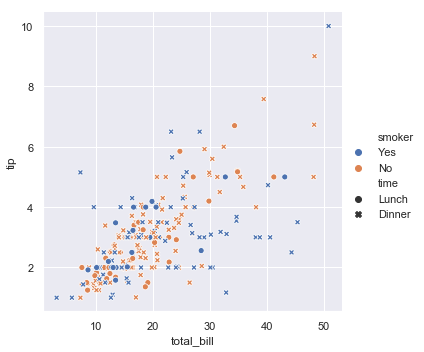

In [12]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips)

위 예시에서 hue semantic은 분류를 위한것이므로 qualitative pallete가 적용되었다. 만일 hue semantic에 숫자데이터가 들어왔다면 sequential pallete로 바뀔 것이다. 
(numeric인 경우 sequential pallete / boolean : qualitative pallete) 

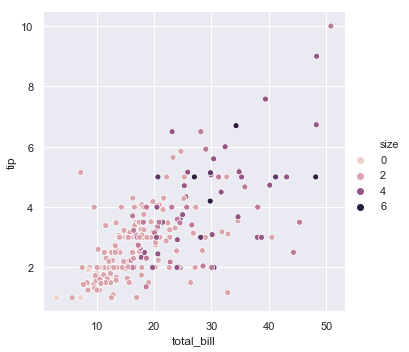

In [13]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips);

이 두 케이스를 통해서 color pallete를 커스터마이징할 수 있게되었고 산점도를 그리는데 있어서 많은 옵션들이 있다는 것을 알게되었다. 우리는 sequential pallete를 'cubehelix_pallete()'를 이용해서 커스터마이징 할 것이다.

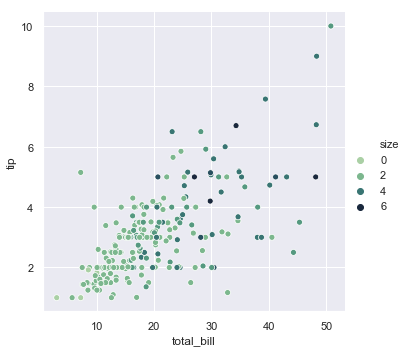

In [16]:
sns.relplot(x='total_bill', y='tip', hue='size', palette='ch:r=-.5,l=.75', data=tips)

이러한 hue semantic을 size로 줄 수 도있다

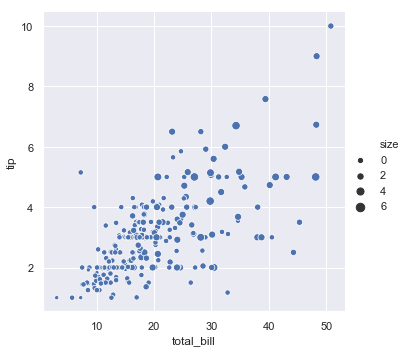

In [17]:
sns.relplot(x='total_bill', y='tip', size='size', data=tips)

matplotlib.pyplot.scatter()와 다르게 변수들에 대한 literal value는 산점도에 찍히는 점의 영역을 선택하는데 사용될 수 없다. 하지만 seaborn에서는 값의 range가 영역 크기를 결정할 수도 있다. 또한 그 range는 커스터마이징이 가능하다.

sns.relplot(x='total_bill''

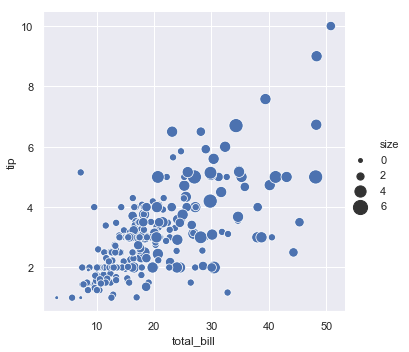

In [18]:
sns.relplot(x='total_bill', y='tip', data=tips, size='size', sizes=(15, 200))

semantic hue에 대한 더 많은 customizing에 대해서는 scatterplot api를 참고하면된다.

## line plots으로 데이터의 연속성을 강조하기

산점도는 아주 효과적이지만 모든 케이스에서 최적화된 데이터 시각화의 방법론은 아니다. 따라서 시각화방법은 특정 데이터셋들을 표현하기 위해서 달라져야 할 것이다.

몇몇 데이터셋은 시계열데이터로 이루어진 것이 있을 것이다. 혹은 연속분포에 유사한 데이터를 다룰때가 있을 것이다. 이런 경우에는 line plot을 이용하여 시각화하는 것이 좋은 방법이다. 이 그래프를 그리기 위해서는 'lineplot()'라는 함수 혹은 relplot메소드에 kine속성을 line으로 주면 그릴 수 있다.

In [19]:
time=np.arange(500)
value=np.random.randn(500).cumsum()

######  dictionary의 key는 pandas dataframe의 column이 되고 value는 그것의 row가 된다.

In [24]:
pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))

,time,value
0,0,-0.284456
1,1,-0.016158
2,2,0.900810
3,3,-0.602443
4,4,0.421916
5,5,0.030348
6,6,-1.715713
7,7,-1.614868
8,8,-1.686866
9,9,-1.546140


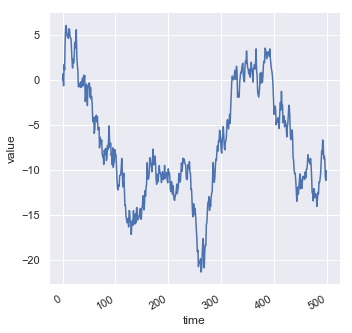

In [26]:
df = pd.DataFrame(dict(time=np.arange(500), value=np.random.randn(500).cumsum()))
g = sns.relplot(data=df, x='time', y='value', kind='line')
g.fig.autofmt_xdate()

lineplot이 x에 대한 y값을 그리기 위해서 사용되는 것으로 가정하기 때문에 그래프를 그리기 전에(plotting) 보통 data를 x축의 값으로 소팅해주는 행위를 한다. 이런 행위를 disabled 시킬 수도 있다.

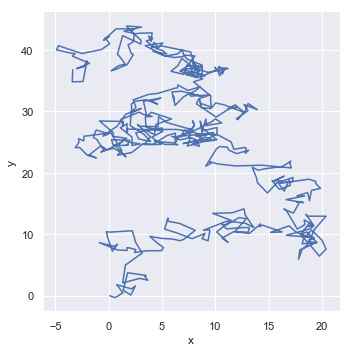

In [27]:
df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=['x', 'y'])
sns.relplot(kind='line', x='x', y='y', sort=False, data=df)

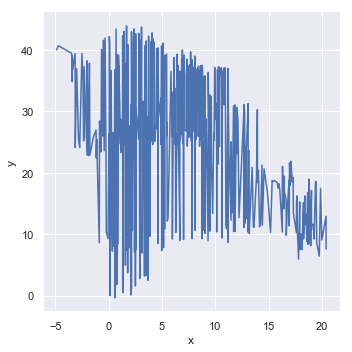

## 집계하기 및 불확실성 표현하기

더 복잡한 데이터셋은 하나의 x 변수에 대한 여러 측정치를 가지는 것들이다. 디폴트로 seaborn에서는 이러한 여러 측정치를 x에 대하여 집게한 후에 이를 평균 및 95%의 신뢰수준으로 표현한다.

In [33]:
fmri = sns.load_dataset("fmri")
fmri.head() 
# timepoint와 signal이 subject로 구분이 되는데 signal값이 따라서 여러개 존재함. 아래에서의 선은 signal의 평균값이고 음영처리된 다른 값들은 95%신뢰도하의 값임.

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


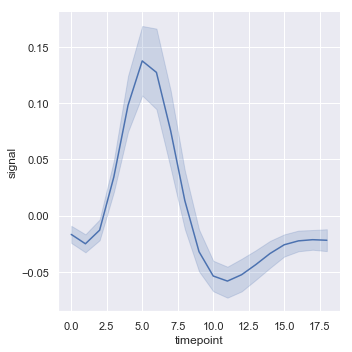

In [34]:
sns.relplot(x='timepoint', y='signal', kind='line', data=fmri)

In [30]:
ㅌ

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


신뢰도구간은 부트스트래핑기법을 이용하여 계산되고 이는 매우 큰 데이터셋에 대해서는 시간이 아주 오래걸리는 작업일 수 있기에 이를 disable할 수 있다.

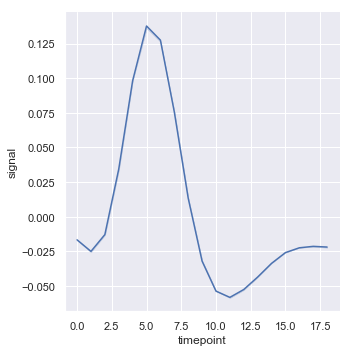

In [35]:
sns.relplot(kind='line', x='timepoint', y='signal', data=fmri, ci=False)

다른 좋은 방안으로는 95% 신뢰도 구간이아니라 데이터의 떨어진 정도를 더 확실하게 보여주도록 표준편차를 이용하여 나타낼 수도 있다.

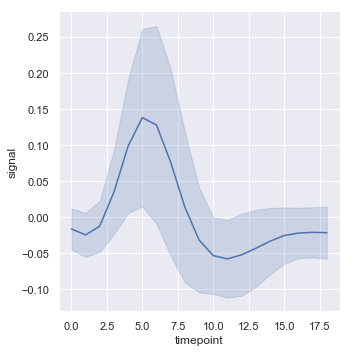

In [37]:
sns.relplot(kind='line', x='timepoint', y='signal', data=fmri, ci='sd')

aggregator 집계를안하게 할 수도 있다. estimator attribute를 None으로 설정함으로써 집계를 안할 수 있다.

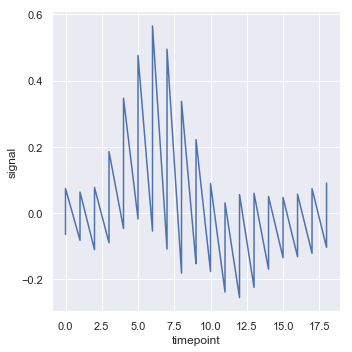

In [39]:
sns.relplot(kind='line', x='timepoint', y='signal', data=fmri, estimator=None)

## semantic mappings로 데이터의 subset 표현하기

lineplot 메소드는 scatterplot과 같이 커스터마이징할 부분이 많다. lineplot또한, 3개의 변수로 표현될 수 있다. hue, size, style을 이용하여 데이터를 표현할 수 있다. lineplot에서 semantics(style, hue, size)를 사용하는건 어떻게 데이터를 집계할 것인지 선택할 것이다. 예를들어, hue semantic을 사용하는 것은 그 plot(점)을 2개의 line과 error bands로 나누고 그것을 각자가 표현하는 데이터 부분합을 표현하기위해서 칠해진다.

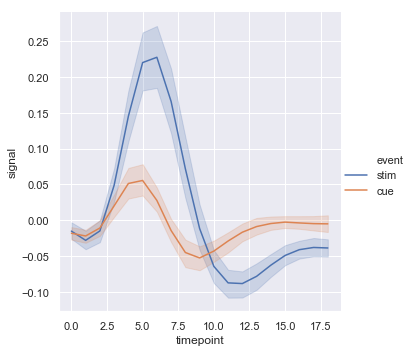

In [40]:
sns.relplot(x='timepoint', y='signal', hue='event', kind='line', data=fmri)

style semantic을 추가하여 line의 점섬을 추가해준다. 

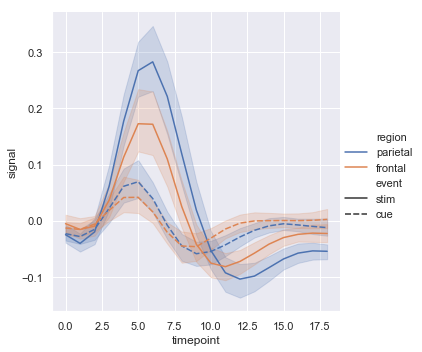

In [41]:
sns.relplot(x='timepoint', y='signal', style='event', hue='region', kind='line', data=fmri)

하지만, 우리는 또한 각 관측치에 사용되는 markers을 이용하여 데이터의 부분합을 나타날 수 있다. (점선을 사용하는 것 이외) 

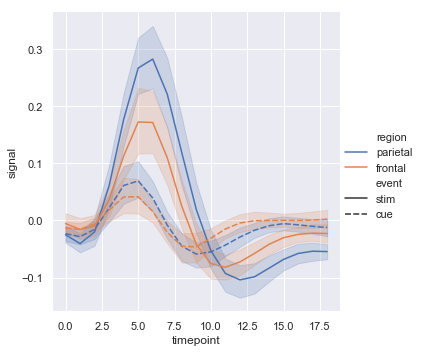

In [43]:
sns.relplot(x='timepoint', y='signal', style='event', hue='region', kind='line', data=fmri, markers=False)

######  hue : name in data, optional
Grouping variable that will produce elements with different colors. Can be either categorical or numeric, although color mapping will behave differently in latter case.

###### size : name in data, optional
Grouping variable that will produce elements with different sizes. Can be either categorical or numeric, although size mapping will behave differently in latter case.

###### style : name in data, optional
Grouping variable that will produce elements with different styles. Can have a numeric dtype but will always be treated as categorical.


scatterplot처럼 lineplot에서도 여러개의 semantics을 이용하는 것은 아주 조심해야한다. 데이터는 여러의미를 담고있지만, 자칫하면 해석하는데 아주 어려움이 있을 수 있다. 하지만, 단지 1개의 변수를 추가하여 전후를 살핀다면 색 혹은 style semantic이 아주 의미있을 것이다. 1개의 변수를 추가로 사용해서 데이터를 구분지을 때, style, hue semantic을 동시에 적용하면 더욱 눈에 띄게 차트를 그릴 수 있을 것이다.

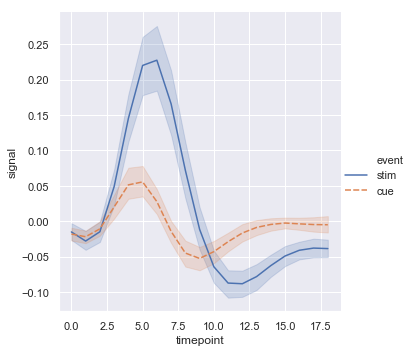

In [47]:
sns.relplot(kind='line', x='timepoint', y='signal', hue='event', style='event', data=fmri)

만일 반복적으로 측정된 데이터를 다루어야 할 때, (다시말해 여러 기간동안 샘플로 뽑인 units을 가지고 있을 때) 각 유닛들을 세만틱으로 구분하지않고 샘플링 유닛을 각각 그릴수 있다. 

pandas의 query는 pandas dataframe에서 subquery같은 느낌이다. table정보에서 가공하고 싶은대로 가공하는 것 바로 이게 query


relplot의 property



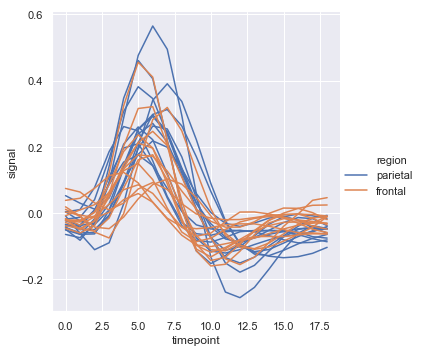

In [48]:
sns.relplot(x='timepoint', y='signal', hue='region',  units='subject', estimator=None, kind='line', data=fmri.query("event == 'stim'"))

lineplot에서 legend를 다루는 것과 colormap은 hue semantic이 boolean이라서 카테고리를 나누는 데이터이냐 숫자데이터이냐로 나뉜다.

In [57]:
dots = sns.load_dataset("dots").query("align=='dots'")

In [63]:
dots["align"].value_counts()

dots    394
Name: align, dtype: int64

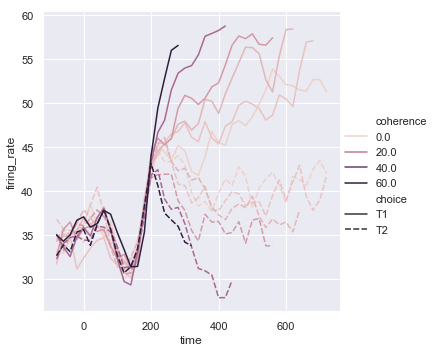

In [59]:
sns.relplot(x='time', y='firing_rate',  hue='coherence', style='choice', kind='line', data=dots)

hue 변수가 숫자형 데이터임에도 불구하고 잘 표현되지 못했다. 이건 hue 변수의 수준이 log에 비례하여커지기는 케이스이기 때문이다. cubehelix_pallete 객체를 이용하여 pallete를 커스터마이징할 수 있다.

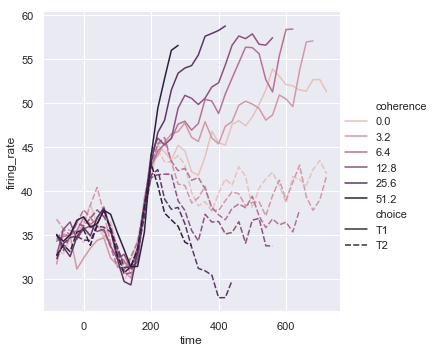

In [62]:
palette = sns.cubehelix_palette(light=0.8, n_colors=6)
sns.relplot(x='time', y='firing_rate', hue='coherence', style='choice', palette=palette, kind='line', data=dots)

또는 colormap을 normalized할수도있다.

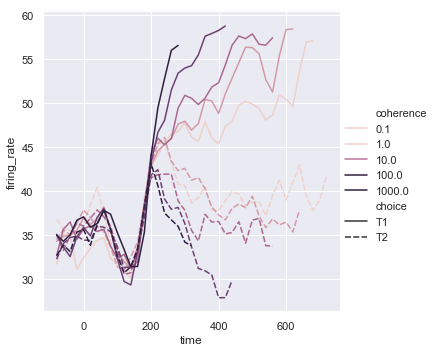

In [65]:
from matplotlib.colors import LogNorm
palette = sns.cubehelix_palette(light=.7, n_colors=6)
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            hue_norm=LogNorm(),
            kind="line", data=dots);

세번째 semantic인 size는 lineplot의 line너비를 바꾼다.

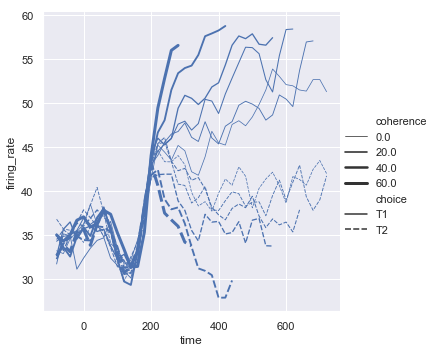

In [66]:
sns.relplot(x="time", y="firing_rate",
            size="coherence", style="choice",
            kind="line", data=dots);

size 변수가 대게 숫자데이터라면 line의 두께를 조정함으로써 값들을 카테고리화 할 수 있다. 이런 행위를 할 때 조심해야하는데 왜냐, 우리 눈은 두께가 굵냐 얇냐를 구분하기가 어렵기 때문이다. 어떤경우에서는 대쉬를 이용하는 것이 좋고 어떤 경우에는 굵기로 데이터를 구분하는 것이 좋다.

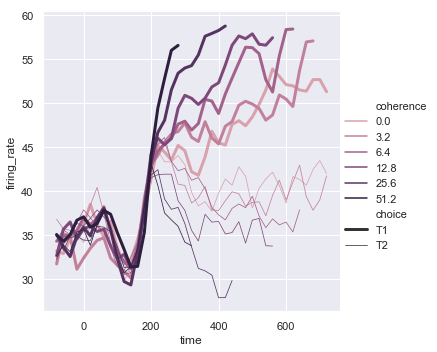

In [67]:
sns.relplot(x="time", y="firing_rate",
           hue="coherence", size="choice",
           palette=palette,
           kind="line", data=dots);

##  날짜데이터를 이용하여 차트그리기

line plot은 시간 및 날짜데이터와 연관된 데이터를 시각화하는데 사용한다. 이 함수들은 그들의 기존포맷에 있는 데이터들을 seaborn의 근간인matplotlib 함수로 parameter passing을 한다. 그래서 seaborn이 날짜데이터를 가지고 시각화를 할 때 matplotlib가 dateformat을 맞추는 장점을 얻을 수 있다., 그 포맷맞추는 것의 모든 것은 matplotlib 층에서 이루어지고 반드시 이것이 어떻게 동작하는지 알기위해서는 maplotlib의 documentaion을 참고해야한다.

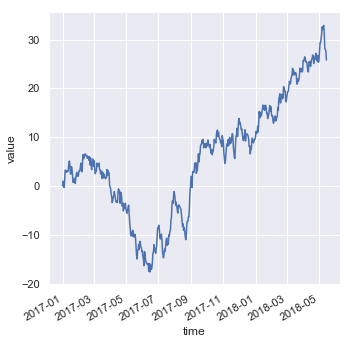

In [69]:
df = pd.DataFrame(dict(time=pd.date_range("2017-01-01", periods=500), value=np.random.randn(500).cumsum()))
g = sns.relplot(x='time', y='value',kind='line', data=df)
g.fig.autofmt_xdate()

## Facets을 이용하여 여러관계를 나타내기

이번 튜토리얼에서 우리는 lineplot, scatterplot에서 여러 semantics에 대해서 배웠었고, 이것은 항상 효과적인 방법이 아니라는 것을 배웠다. 하지만, 2개 변수에 대한 관계가 2개이상 변수에 어떻게 정의되어있는 지 보기 위해서는 어떻게 해야할까? 


가장 좋은 방법은 1개의 plot에 모든 것을 설명하는 것이아니라 여러개의 plot을 만드는 것일 것이다. relplot이 return하는 값이 FacetGrid 객체이기때문에, 이것은 아주 쉽게 표현할 수 있다. 추가변수에 대한 영향력정도를 보여주기위해서 semantic을 사용하지 않고 facet visualization을 이용한다. 이것은 우리에게 더 많은 축(axes)와 dataset의 subset에 대한 표현을 더 다채롭게 해줄 ㄳ이다.

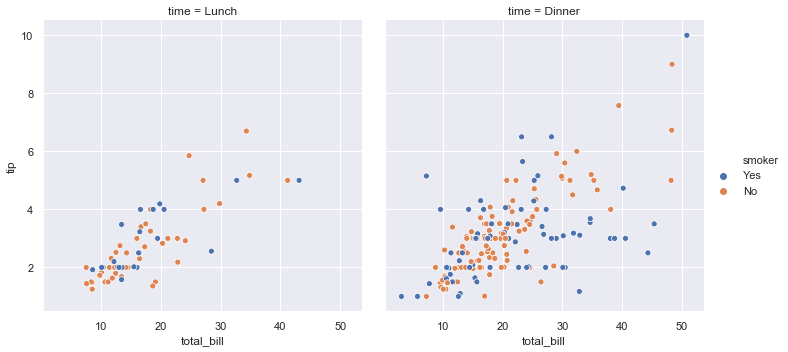

In [70]:
sns.relplot(x='total_bill', y='tip', hue='smoker', col='time', data=tips)

또한 이런 방법으로 2개 변수의 영향력을 보여줄 수 있다. : column과 row를 faceting함으로써 그래프를 4개를 그릴 수 있다. 더 많은 변수들을 grid에 추가함에 따라 각 plot의 figure size는 감소할 것이다. 하지만 항상 우리가 FacetGrid의 크기를 정할 수 있다는 것을 잊지말자!

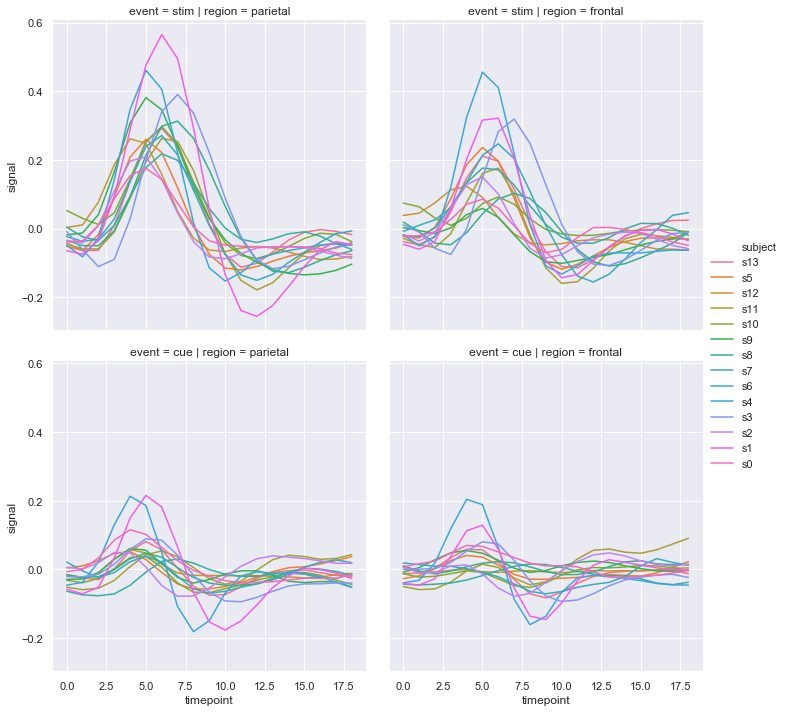

In [72]:
sns.relplot(x='timepoint', y='signal', hue='subject', col='region', row='event', height=5, kind='line', estimator=None, data=fmri)

여러개의 column 및 row를 탐색하고자할때는 wrap을 이용해서 plot의 개수를 한 행에 혹은 한 열에 몇개씩 나타내는 지 정해주는 것이 좋다.

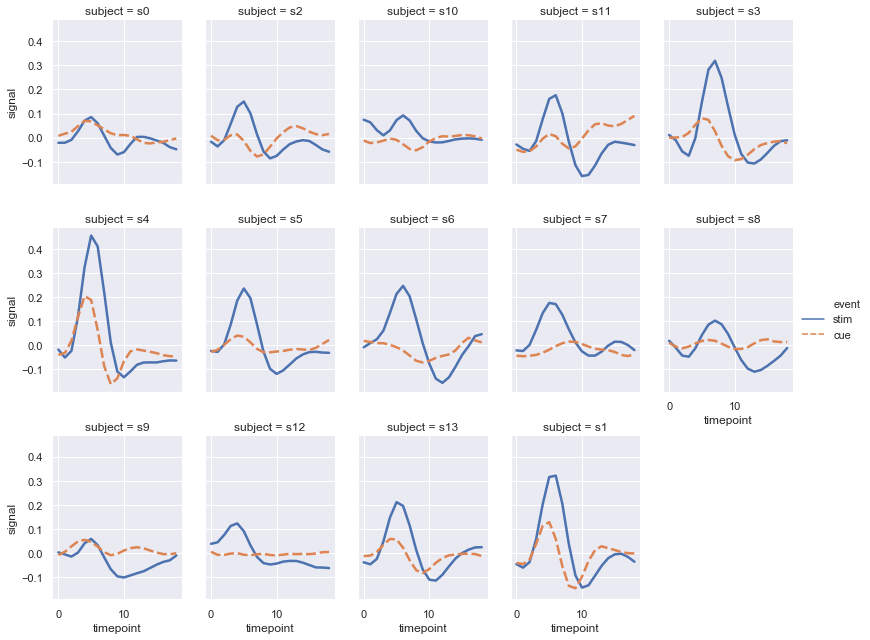

In [73]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"));

이런 plot을 "lattice", "small-multiples" plot이라고 부르며 눈으로 각 패턴 